Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.express as px

Create the dataframe after importing the dataset

In [ ]:
#Importing data
df_housing = pd.read_csv('/content/Real-estate1.csv')
df_housing.drop('No', inplace = True,axis=1)

print("Dataframe: \n",df_housing.head(),"\n")
print("Columns: \n ",df_housing.columns)

Dataframe: 
    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                  

Creating a scatterplot to visualize the data

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

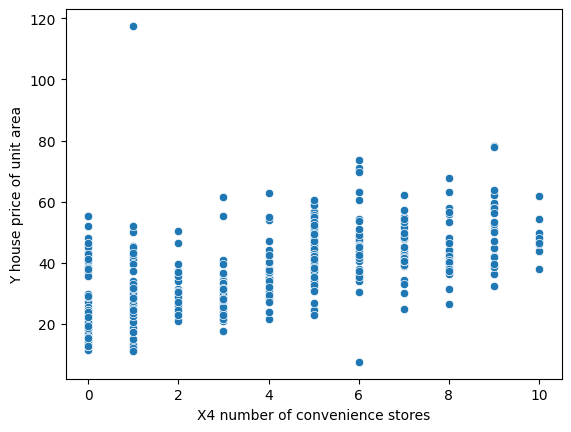

In [ ]:
#Plotting a scatterplot between an independent variable (X4) and a dependent variable (Y)

sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data=df_housing)

<Axes: >

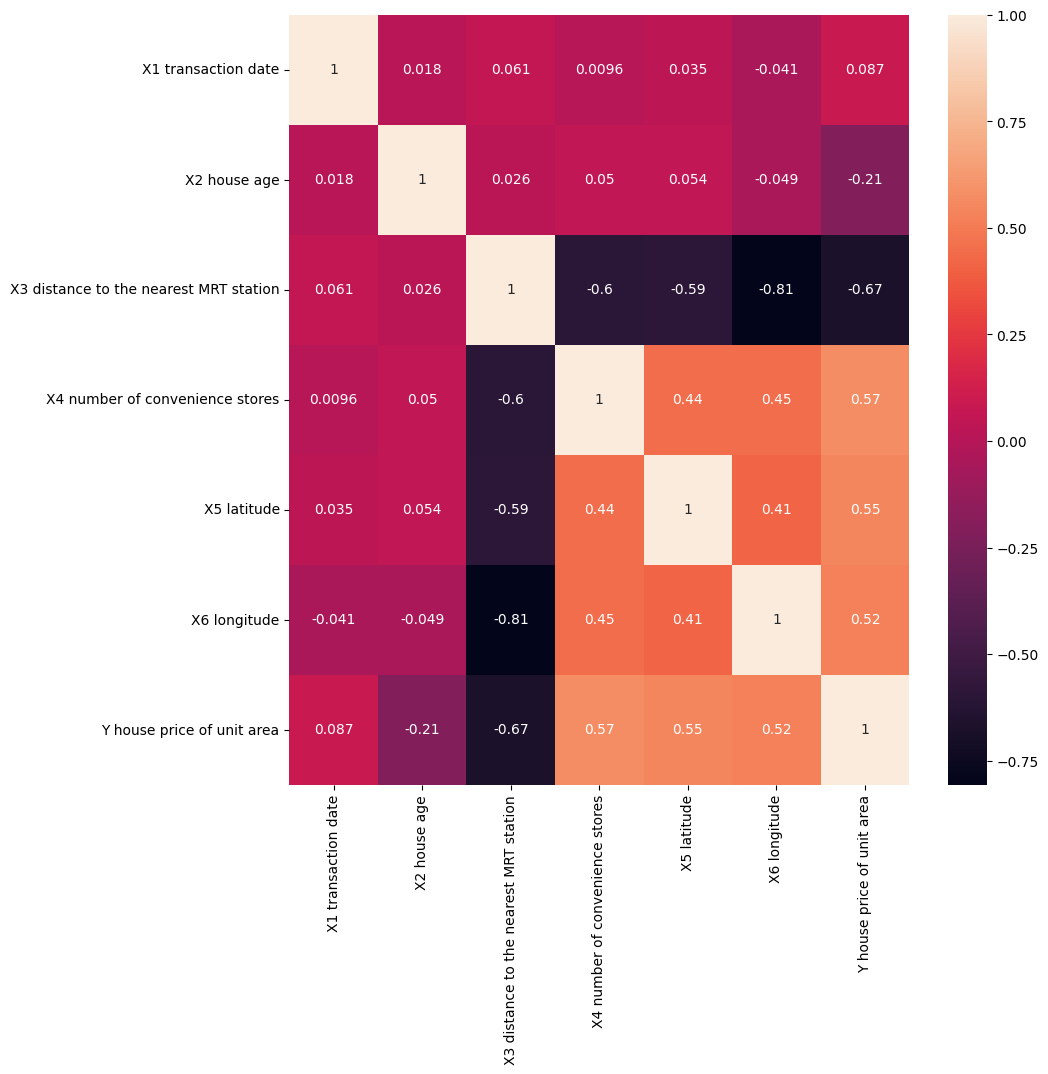

In [ ]:
#Plotting a heatmap to visualize the correlation between independent and dependent variables

#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(df_housing.corr(), annot = True)

Creating the feature variables x and y

In [ ]:
#Creating feature variables
X = df_housing.drop('Y house price of unit area',axis= 1)
y = df_housing['Y house price of unit area']
print(X,"\n")
print(y,"\n")
Xcrop=X.loc[:,"X4 number of convenience stores":"X5 latitude"]
print(Xcrop,"\n")


     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

Split the data into train and test sets

In [ ]:
# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Xcrop, y, test_size=0.3, random_state=101)

Create a Multiple Linear Regression Model and fitting it

In [ ]:
# creating a regression model
model = LinearRegression()


#Fit the model with training data
model.fit(X_train,y_train)

LinearRegression()

Make predictions on the test data set

In [ ]:
# Making predictions
y_hat = model.predict(X_test)

Evaluating the performance of the model based on Error Metrics and R2 Score

In [ ]:
#Error Metrics
# model evaluation
print(
  'Mean_squared_error : ', mean_squared_error(y_test, y_hat))
print(
  'Mean_absolute_error : ', mean_absolute_error(y_test, y_hat))


Mean_squared_error :  72.22044896922839
Mean_absolute_error :  6.757458445741944


In [ ]:
# Visualising the Linear Regression results
#Using 3D Plots to plot 3 dimensions with the Plotly library

x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z = np.sin(np.sqrt(x**2 + y**2))

fig = go.Figure(data=go.Surface(x=X["X2 house age"], y=X["X5 latitude"], z=y_test, colorscale='Viridis'))

fig.update_layout(
    title='Surface Plot',
    scene=dict(
        xaxis=dict(title='X2'),
        yaxis=dict(title='X5'),
        zaxis=dict(title='Y, House Price')
    )
)
fig.show()
